<a href="https://colab.research.google.com/github/priyanu17/churn_modelling/blob/master/churn_modelling_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd


In [11]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
## Libraries loaded

In [0]:
## Problem Statement : chrun modelling on fictional company

In [0]:
churn_data = pd.read_csv("Churn_Modelling.csv")

In [15]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
churn_data.shape

(10000, 14)

In [17]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
churn_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [21]:
churn_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [22]:
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
## Checking for null values in the data:
((churn_data.isna().sum()/len(churn_data))*100).round(2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [0]:
# No null values exist

In [24]:
churn_data.duplicated(keep = "first").value_counts()

False    10000
dtype: int64

In [0]:
# No duplicate values exist

In [27]:
churn_data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


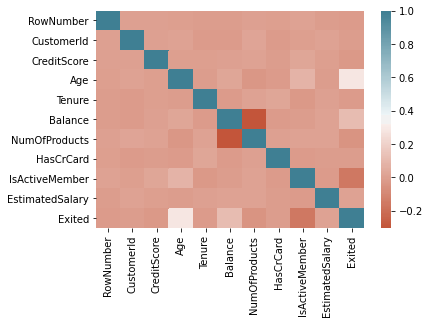

In [30]:
import seaborn as sns
sns.heatmap(churn_data.corr(), cmap=sns.diverging_palette(20, 220, n=200))

In [0]:
# Finding top 10 unique absolute correlations

In [0]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [39]:
print("Top Absolute Correlations for DEFAULT category are as follows :")
print()
print(get_top_abs_correlations(churn_data.select_dtypes(include=['float64', 'int64']), 10))

Top Absolute Correlations for DEFAULT category are as follows :

Balance         NumOfProducts     0.304180
Age             Exited            0.285323
IsActiveMember  Exited            0.156128
Balance         Exited            0.118533
Age             IsActiveMember    0.085472
NumOfProducts   Exited            0.047820
Age             NumOfProducts     0.030680
Tenure          IsActiveMember    0.028362
Age             Balance           0.028308
CreditScore     Exited            0.027094
dtype: float64


In [0]:
## Data Preprocessing 

In [0]:
X = churn_data.iloc[:, 3:-1].values
y = churn_data.iloc[:, -1].values

In [42]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [43]:
print(y)

[1 0 1 ... 1 1 0]


In [0]:
# Encoding the categorical data:

# 'Gender' column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [45]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [0]:
# Encoding the categorical data:

# 'Geography' column

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer( transformers = [('encoder', OneHotEncoder(), [1]) ], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [47]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [0]:
# Spliting the data into training set and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
# All columns have been scaled 
print(X_train)

[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]


In [0]:
# Building the ANN:
ann = tf.keras.models.Sequential()

# Input layer and first layer:
ann.add(tf.keras.layers.Dense(units = 8, activation= 'relu'))

# second layer:
ann.add(tf.keras.layers.Dense(units = 8, activation= 'relu'))

# output layer:
ann.add(tf.keras.layers.Dense( units = 1, activation = 'sigmoid'))

In [0]:
# Compiling the ann:
ann.compile( optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [57]:
ann.fit( X_train, y_train, batch_size = 16, epochs = 50)

Epoch 1/50
500/500 [==============================] - 1s 1ms/step - loss: 0.5209 - accuracy: 0.7950
Epoch 2/50
500/500 [==============================] - 1s 1ms/step - loss: 0.4517 - accuracy: 0.7960
Epoch 3/50
500/500 [==============================] - 1s 1ms/step - loss: 0.4332 - accuracy: 0.7960
Epoch 4/50
500/500 [==============================] - 1s 1ms/step - loss: 0.4238 - accuracy: 0.7974
Epoch 5/50
500/500 [==============================] - 1s 1ms/step - loss: 0.4155 - accuracy: 0.7997
Epoch 6/50
500/500 [==============================] - 1s 1ms/step - loss: 0.4055 - accuracy: 0.8196
Epoch 7/50
500/500 [==============================] - 1s 1ms/step - loss: 0.3940 - accuracy: 0.8322
Epoch 8/50
500/500 [==============================] - 1s 1ms/step - loss: 0.3850 - accuracy: 0.8355
Epoch 9/50
500/500 [==============================] - 1s 1ms/step - loss: 0.3783 - accuracy: 0.8410
Epoch 10/50
500/500 [==============================] - 1s 1ms/step - loss: 0.3727 - accuracy: 0.8428

In [0]:
# making predictions:

y_pred = ann.predict(X_test)

In [59]:
print(y_pred)

[[0.24760693]
 [0.40834236]
 [0.0981532 ]
 ...
 [0.1534087 ]
 [0.18316013]
 [0.1762394 ]]


In [0]:
y_pred = (y_pred > 0.5 )

In [65]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1500   95]
 [ 186  219]]


0.8595